<a href="https://colab.research.google.com/github/Darsanarajeev27/Data-Structures/blob/main/Random_Forest_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading of the file of the given dataset

In [5]:
data = pd.read_csv('/content/winequality-red.csv')

visualization of top 10 records of my data

In [ ]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


classes of target value - quality

In [ ]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

description of the given dataset

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


to check the missing values

In [ ]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


correlation matrix among all features

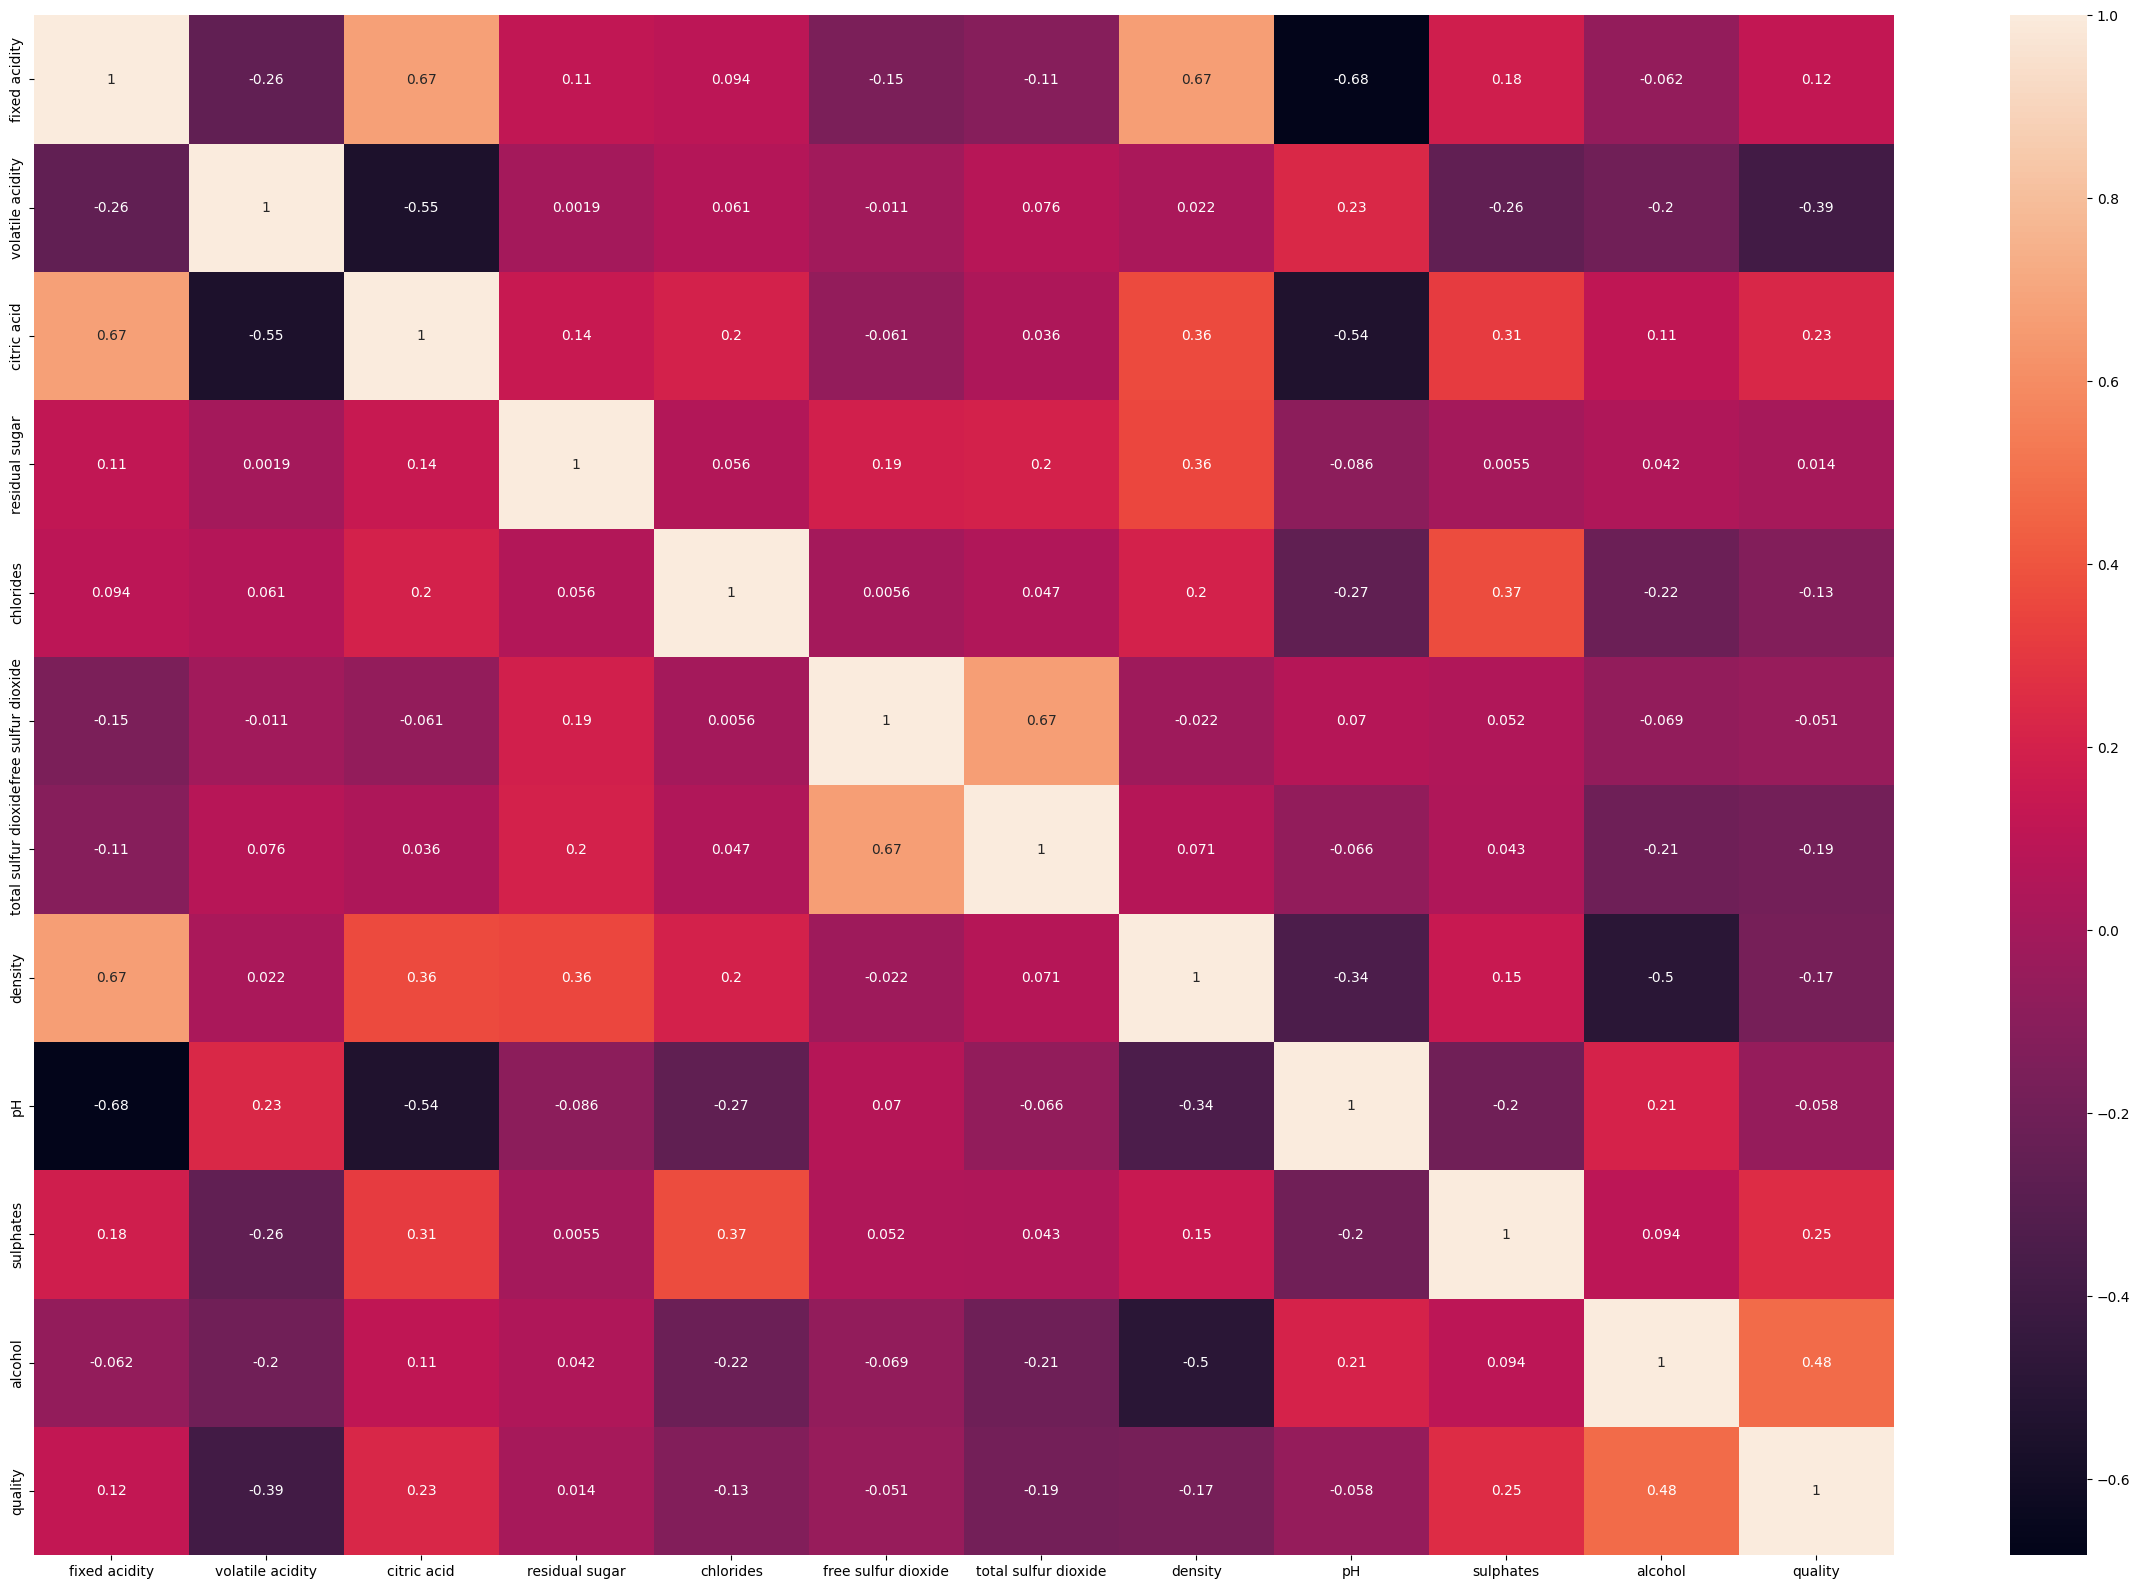

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(30,20))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.savefig('Correlation Matrix.png')
plt.show()

Detection of outliers using zscore


In [6]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

z>3(Threshhold) -> This is an outlier

In [7]:
print(np.where(z>2))

(array([   9,   11,   13,   14,   14,   15,   15,   17,   17,   18,   19,
         19,   32,   33,   33,   35,   38,   38,   39,   40,   41,   42,
         43,   45,   45,   45,   45,   46,   46,   53,   57,   73,   79,
         79,   79,   81,   81,   81,   83,   83,   86,   86,   86,   88,
         88,   90,   90,   91,   91,   91,   92,   92,   92,   94,   94,
         94,   94,   95,   95,   95,   98,  106,  106,  106,  109,  109,
        120,  126,  127,  130,  131,  131,  132,  132,  134,  142,  142,
        142,  144,  144,  144,  145,  147,  151,  151,  151,  151,  151,
        154,  154,  155,  155,  156,  156,  157,  157,  160,  161,  161,
        163,  163,  164,  164,  167,  169,  169,  169,  170,  181,  181,
        188,  189,  190,  192,  195,  198,  198,  199,  199,  201,  201,
        201,  205,  205,  206,  206,  207,  215,  215,  219,  224,  226,
        226,  230,  234,  239,  240,  240,  240,  241,  243,  244,  255,
        258,  258,  258,  261,  261,  264,  266,  

Remove those records whose z>3(outlier)

In [8]:
new_data = data[(z<3).all(axis=1)]

In [9]:
new_data.shape

(1451, 12)

In [10]:
data.shape

(1599, 12)

Splitting into features(x) and target column(y)

In [11]:
from sklearn.model_selection import train_test_split
x = new_data.drop(columns='quality') #input feature
y = new_data['quality'] #outcome

In [12]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Data modeling using random forest classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_classificationModel = RandomForestClassifier(n_estimators=100)

In [16]:
rf_classificationModel.fit(x_train, y_train)

RandomForestClassifier()

Prediction of data using random forest model

In [22]:
y_pred = rf_classificationModel.predict(x_test)

In [23]:
y_pred

array([6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 7,
       6, 5, 6, 5, 7, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5, 5, 6,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6,
       6, 6, 7, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 6,
       5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 7, 5, 5, 5, 5, 6, 5, 6,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 6, 7, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5,
       5, 7, 5, 7, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6,
       6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 7, 6, 6, 6, 7, 6, 6, 6, 7, 5,
       6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 7, 6, 7, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 6, 7, 5, 6, 6, 6, 6, 5, 7, 6, 5, 6, 5, 5, 5, 6, 5, 6, 7,
       6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 7, 7, 5, 5, 7, 6, 5, 5,
       6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 7,
       5, 6, 6, 6, 7])

Data evaluation on metrics

In [24]:
from sklearn import metrics
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.7250859106529209


Accuracy Score: 72.5%

[Text(0.6181565644631224, 0.975, 'x[0] <= 9.95\ngini = 0.639\nsamples = 728\nvalue = [32, 491, 469, 155, 13]'),
 Text(0.3526463071486738, 0.925, 'x[7] <= 0.995\ngini = 0.629\nsamples = 601\nvalue = [26, 444, 352, 120, 10]'),
 Text(0.4854014358058981, 0.95, 'True  '),
 Text(0.09068171242438343, 0.875, 'x[9] <= 0.535\ngini = 0.667\nsamples = 145\nvalue = [7, 52, 111, 70, 5]'),
 Text(0.03536528617961843, 0.825, 'x[8] <= 3.595\ngini = 0.502\nsamples = 28\nvalue = [3, 27, 7, 3, 0]'),
 Text(0.026058631921824105, 0.775, 'x[10] <= 11.75\ngini = 0.41\nsamples = 26\nvalue = [1, 27, 5, 3, 0]'),
 Text(0.018613308515588647, 0.725, 'x[1] <= 0.898\ngini = 0.242\nsamples = 21\nvalue = [1, 26, 2, 1, 0]'),
 Text(0.014890646812470917, 0.675, 'x[4] <= 0.069\ngini = 0.193\nsamples = 20\nvalue = [1, 26, 1, 1, 0]'),
 Text(0.007445323406235459, 0.625, 'x[8] <= 3.385\ngini = 0.625\nsamples = 4\nvalue = [1, 2, 0, 1, 0]'),
 Text(0.0037226617031177293, 0.575, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]'),
 

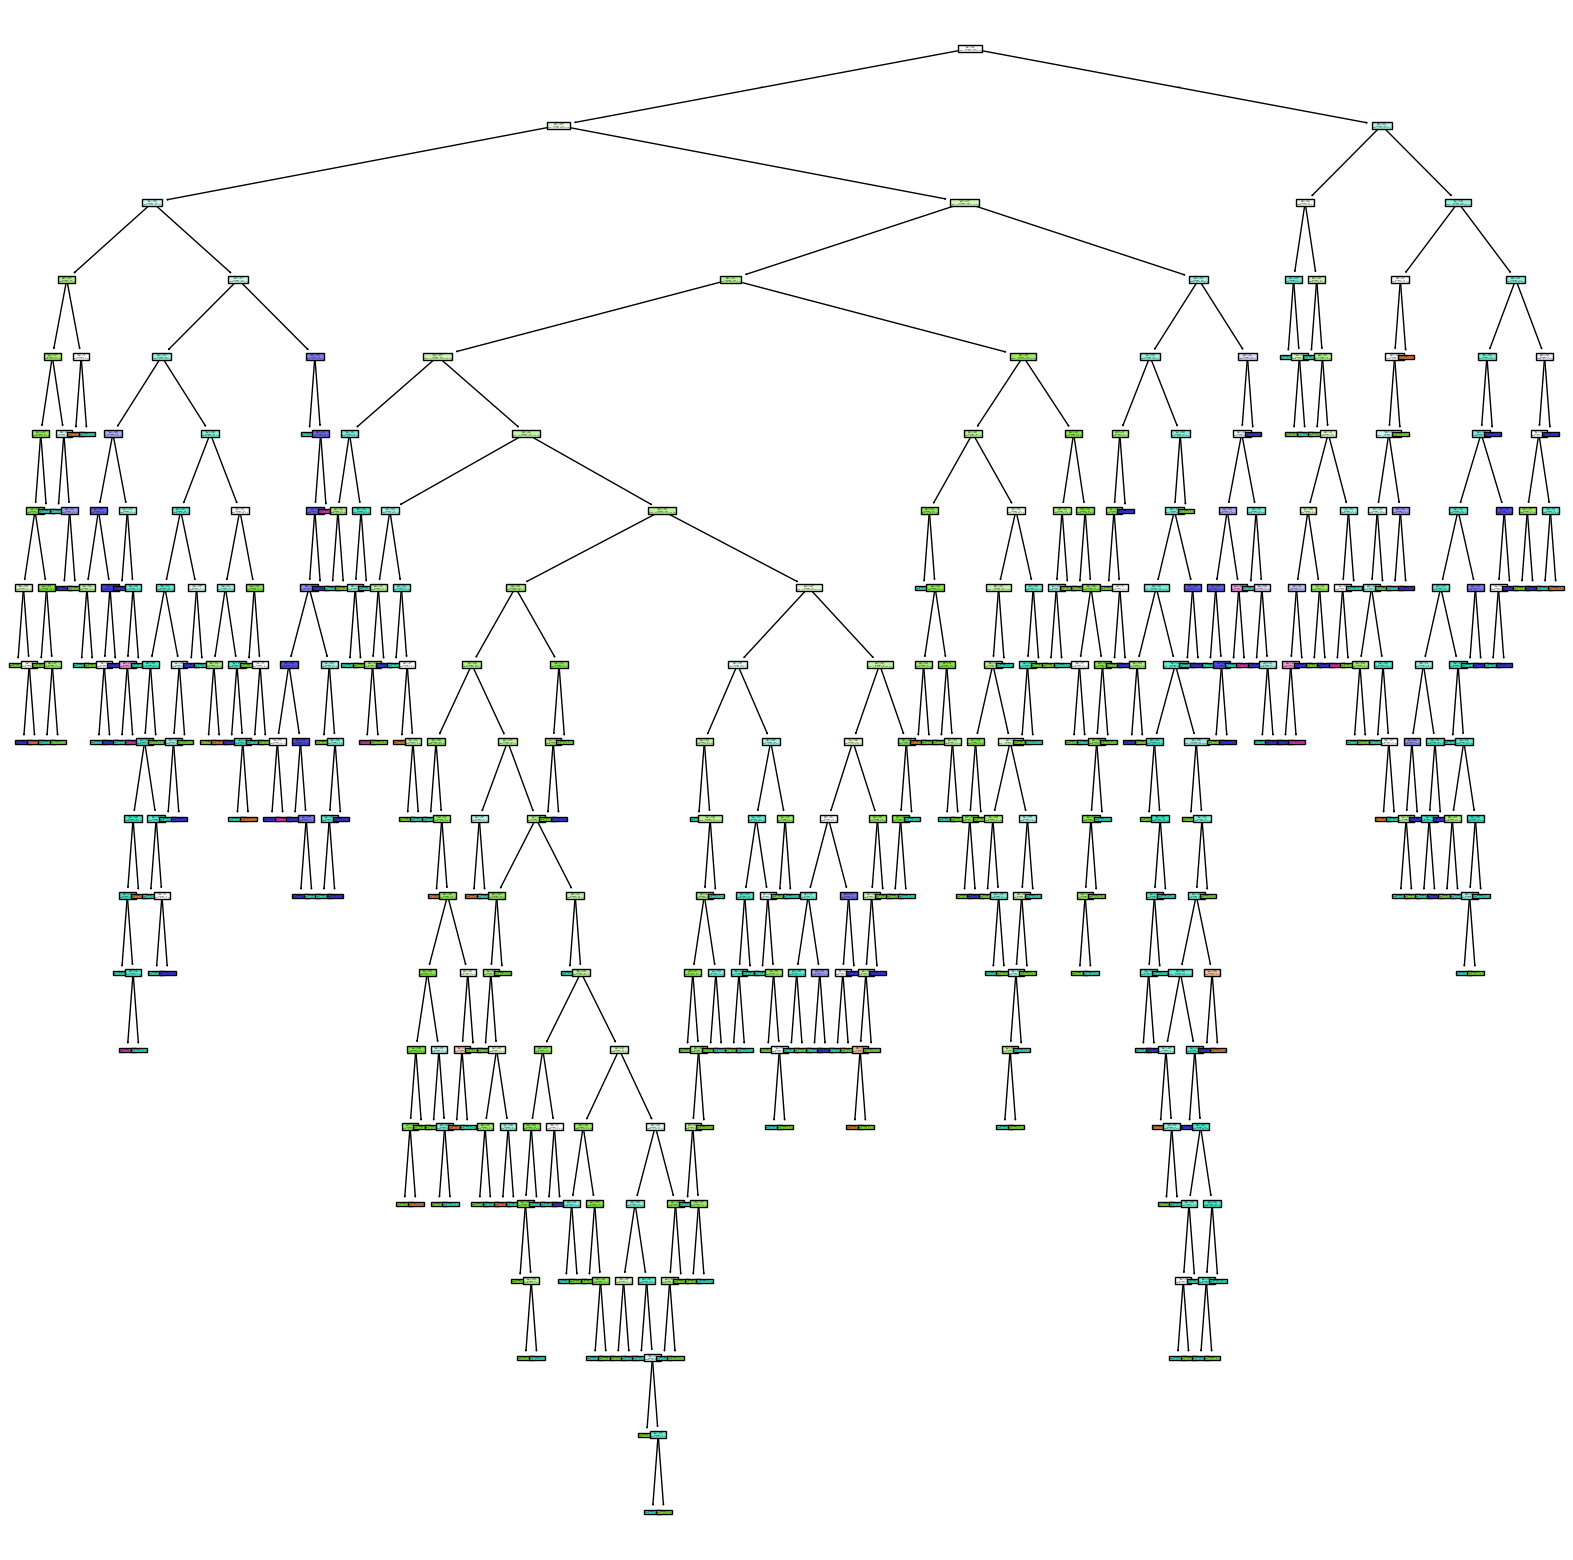

In [26]:
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(rf_classificationModel.estimators_[0], filled=True)